In [1]:
import geopandas as gpd
import pandas as pd
import os
from shapely.geometry import LineString, Point

In [2]:
os.chdir('D:/bachelors/datasets/')

In [3]:
graphs = [
    pd.read_csv(
        'analysis/yearly_graphs_v4/total/' + i
    ) for i in os.listdir('analysis/yearly_graphs_v4/total/') if 'edges' in i and 'csv' in i
]


nodes = [
    pd.read_csv(
        'analysis/yearly_graphs_v4/total/' + i
    ) for i in os.listdir('analysis/yearly_graphs_v4/total/') if 'nodes' in i and 'csv' in i
]

In [4]:
nodes[0]

,commune,flow_cent,flow_cent_weighted,lat,lon
0,'s-Hertogenbosch,3613.827049,5927.624465,51.716578,5.354612
1,Aalburg,427.784161,1255.413914,51.745721,5.068460
2,Alkmaar,1658.776524,2484.944069,52.600515,4.804279
3,Almere,2943.174698,5051.166692,52.366282,5.249946
4,Amersfoort,2809.391779,4822.651704,52.173152,5.388570
...,...,...,...,...,...
374,Ommen,347.854964,734.611838,52.515771,6.442287
375,Olst-Wijhe,403.777764,814.046731,52.366562,6.159955
376,Roerdalen,310.453735,444.555228,51.146364,6.044111
377,Eijsden-Margraten,575.186315,589.939585,50.802984,5.782201


In [5]:
import json
with open('Variables/mappers/coordinates_map_final.json') as infile:
    coordinates_map = json.load(infile)

In [6]:
def get_geoLines(edge_list):
    return gpd.GeoDataFrame(
        edge_list,
        geometry = [
            LineString([(lon_start, lat_start),
                       (lon_finish, lat_finish)]) for lat_start, lon_start, lat_finish, lon_finish in zip(edge_list.lat_start,
                                                                                       edge_list.lon_start,
                                                                                       edge_list.lat_finish,
                                                                                       edge_list.lon_finish)],
        crs = {'init' : 'epsg:4326'}
    )


def get_geoPoints(node_list):
    return gpd.GeoDataFrame(
        node_list,
        geometry = [Point(xy) for xy in zip(node_list.lon, node_list.lat)],
        crs = {'init' : 'epsg:4326'}
    )

In [7]:
graph_dev = get_geoLines(
    pd.concat(graphs).groupby(['local_1', 'local_2'])['flow'].std().reset_index().dropna().assign(
        lat_start = lambda frame: frame.local_1.map(coordinates_map).str['lat'],
        lon_start = lambda frame: frame.local_1.map(coordinates_map).str['lon'],
        lat_finish = lambda frame: frame.local_2.map(coordinates_map).str['lat'],
        lon_finish = lambda frame: frame.local_2.map(coordinates_map).str['lon']
    )
)

node_dev = get_geoPoints(
    pd.concat(nodes).groupby('commune')['flow_cent'].std().reset_index().dropna().assign(
        lat = lambda frame: frame.commune.map(coordinates_map).str['lat'],
        lon = lambda frame: frame.commune.map(coordinates_map).str['lon']
    )
)

In [8]:
import numpy as np

In [9]:
graph_dev = get_geoLines(
    pd.concat(graphs).groupby(['local_1', 'local_2'])['flow'].agg(
        lambda x: np.mean(abs(x - x.mean())/ x.mean())
    ).reset_index().dropna().assign(
        lat_start = lambda frame: frame.local_1.map(coordinates_map).str['lat'],
        lon_start = lambda frame: frame.local_1.map(coordinates_map).str['lon'],
        lat_finish = lambda frame: frame.local_2.map(coordinates_map).str['lat'],
        lon_finish = lambda frame: frame.local_2.map(coordinates_map).str['lon']
    )
)

node_dev = get_geoPoints(
    pd.concat(nodes).groupby('commune')['flow_cent'].agg(
        lambda x: np.mean(abs(x - x.mean())/ x.mean())
    ).reset_index().dropna().assign(
        lat = lambda frame: frame.commune.map(coordinates_map).str['lat'],
        lon = lambda frame: frame.commune.map(coordinates_map).str['lon']
    )
)

In [10]:
graph_dev.to_file('analysis/link_deviation.gpkg', driver = 'GPKG')
node_dev.to_file('analysis/node_deviation.gpkg', driver = 'GPKG')

CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_link_deviation_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_link_deviation_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'


CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_node_deviation_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_node_deviation_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'


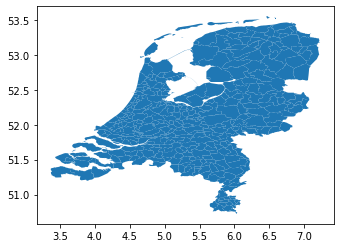

In [20]:
communes = gpd.read_file('../qgis/base/Netherlands_communes.gpkg')
communes.plot()

In [22]:
node_dev

,commune,flow_cent,lat,lon,geometry
0,'s-Hertogenbosch,0.121914,51.716578,5.354612,POINT (5.35461 51.71658)
1,Aa en Hunze,0.219305,52.992338,6.735571,POINT (6.73557 52.99234)
2,Aalburg,0.208823,51.745721,5.068460,POINT (5.06846 51.74572)
3,Aalsmeer,0.146056,52.256592,4.756445,POINT (4.75644 52.25659)
4,Aalten,0.150606,51.923426,6.569697,POINT (6.56970 51.92343)
...,...,...,...,...,...
374,Zundert,0.253123,51.478423,4.644465,POINT (4.64446 51.47842)
375,Zutphen,0.121893,52.136103,6.241262,POINT (6.24126 52.13610)
376,Zwartewaterland,0.197611,52.601674,6.070748,POINT (6.07075 52.60167)
377,Zwijndrecht,0.095814,51.821506,4.606817,POINT (4.60682 51.82151)


In [23]:
communes = communes.merge(node_dev[['commune', 'flow_cent']].rename(
    columns = {'commune' : 'NAME'}
), on = 'NAME', how = 'left')

In [53]:
Heerenveen = pd.read_csv('analysis/heerenveen.csv')['flow_cent'].mean()

In [54]:
Heerenveen

0.14993312268709594

In [49]:
Heerenveen.geometry.bounds

,minx,miny,maxx,maxy
358,5.797224,52.910395,6.211687,53.080752


In [56]:
communes.loc[communes.NAME == 'Heerenveen', 'flow_cent'] = Heerenveen

In [57]:
communes.to_file('analysis/communes_deviation.gpkg', driver = 'GPKG')

CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_communes_deviation_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_communes_deviation_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'
